# Neural Networks
Introduction to Machine Learning and Pattern Recognition <br>
Author: <b>GIAN CARLO ALIX</b> <br>
<i><b>Disclaimer: </b>Note that this Machine Learning project was used as an Assignment Submission and<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; thereby is <b>copyrighted</b>. No part of this Notebook may be used for<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; replication, publication, and submission. This is merely for reference only<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; and to showcase a demonstrative example of Neural Networks in Machine Learning.<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Use as reference only; include citations; and use of material is at your own risk!</i>

### The notMNIST Dataset
<img src="img/notmnist.png">
The <a href="http://yaroslavvb.blogspot.ca/2011/09/notmnist-dataset.html" target="_blank">notMNIST Dataset</a> is a permuted version of the built-in MNIST dataset, which consists of 28 x 28 images of 10 letters (A through J), in different fonts. The dataset has 18,720 observations - and for this project, we divide it into the training set, the validation set and the testing set. The dataset is in a file called "notMNIST.npz".

### 1.1 Feedforward Neural Networks
Using the given notMNIST dataset, we will be building the feedforward neural network architecture and training it over several epochs using batch training and a gradient descent algorithm (Adam).

Let us begin by importing the necessary packages for our project.

In [1]:
import tensorflow as tf
import numpy as np
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Then we import our notMNIST data provided to us.

In [2]:
with np.load("notMNIST.npz") as data:
   Data, Target = data["images"], data["labels"]
   np.random.seed(521)
   randIndx = np.arange(len(Data))
   np.random.shuffle(randIndx)
   Data = Data[randIndx]/255.
   Target = Target[randIndx]
   trainData, trainTarget = Data[:15000], Target[:15000]
   validData, validTarget = Data[15000:16000], Target[15000:16000]
   testData, testTarget = Data[16000:], Target[16000:]

Let us begin by querying some important information. We know from the above that there are 18,724 images of 28x28 pixels each. The data was split into training data, validation data, and the test data (15000 used for training, 1000 used for valiation and the remaining 2724 used for testing). 

To know how many input units there are in our Neural Network, that is equal to the number of pixels there are for each image. So 28 x 28 = 784 which can be verified below. For the output_labels, know that there will be 10 since are 10 alphabets to consider [A-J].

In [3]:
input_units = np.shape(trainData)[1] * np.shape(trainData)[2]
output_labels = len(np.unique(Target)) 
print("Input units: ", input_units, ", Output labels: ", output_labels)

Input units:  784 , Output labels:  10


#### 1.1.1. Layer-wise Building Block
We first build the <b>mlp( )</b> function, which is a vectorized TensorFlow function that takes the hidden activations from the previous layer then return the weighted sum of the inputs.<br>
<b>Input:</b> the input tensor <b>X</b> and the number of hidden units <br>
<b>Output:</b> the computed weighted sum for all the data points in the mini-batch

In [4]:
def mlp(X, hidden_units):
        # the initializer to be used is the Xavier Initializer
   initializer = tf.glorot_normal_initializer()

        # we provide the weights for the hidden layer and for the output layer, initialized using Xavier (or Glorot)
   weight_matrix = {
        'hidden_weight': tf.Variable(initializer([input_units, hidden_units])),
        'out_weight': tf.Variable(initializer([hidden_units, output_labels]))
    }
    
        # we provide the biases for the hidden layer and for the output layer, initialized to 0
   bias_matrix = {
        'hidden_bias': tf.Variable(tf.zeros([hidden_units])),
        'out_bias': tf.Variable(tf.zeros([output_labels]))
    }
    
        # building the feedforward neural network
   hidden_layer = tf.add(tf.matmul(X, weight_matrix['hidden_weight']), bias_matrix['hidden_bias'])
   hidden_layer = tf.nn.relu(hidden_layer)          
   output_layer = tf.add(tf.matmul(hidden_layer, weight_matrix['out_weight']), bias_matrix['out_bias'])
    
   return output_layer

#### 1.1.2. Learning
We begin by setting up all variables and functions that we will be needing for training.

In [5]:
    # Define the placeholder tensors, X (represented as input) and y (represented as output)
X = tf.placeholder(tf.float32, [None, input_units])
y = tf.placeholder(tf.float32, [None, output_labels])

In [6]:
    # Set some random seed
seed = 64
rand = np.random.RandomState(seed)

    # We will be running our algorithm under 10 epochs, using a batch size of 150 and the stepping size of 100
epochs = 10
batch_size = 150
step_size = 100

    # There are three possible learning rates to consider and try out. We'll use 0.001 for now
learning_rate_1 = 0.1
learning_rate_2 = 0.01
learning_rate_3 = 0.001

    # In the next Exercise, we will be playing with the number of hidden units. For now, we'll use 1000
hidden_units_1 = 1000
hidden_units_2 = 500
hidden_units_3 = 100

Here, <b>logits</b> is a tensor that calls on the vectorized function that we have written, passing the arguments X, our input tensor and the number of hidden units 1000. This should be able to build an architecture and compute an output vector of 10 given the 28 x 28 = 784 input units of X. 

The loss computes the mean of the softmax of the logits and y. The optimizer to be used is the AdamOptimizer.

The last three lines of the code will help us calculate accuracies and the classification errors.

In [7]:
logits = mlp(X, hidden_units_1)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss)

corr_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
errors = tf.subtract(tf.size(corr_pred),tf.reduce_sum(tf.cast(corr_pred, tf.int32)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



To handle the shape of the targets, we have to convert into one-hot vectors. For example, 2 when one-hot encoded is [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].

In [8]:
    # given a label, convert it to one-hot vector
def label_encoder(label):
   one_hot_vector = np.zeros((10,1))
   one_hot_vector[label] = 1;
   return one_hot_vector.T

    # given a numpy array, convert to one-hot array
def one_hot_encoder(arr):
   one_hot = []
   for x in np.nditer(arr):
        one_hot_label = label_encoder(x)
        one_hot.append(one_hot_label)
   return np.concatenate(one_hot, axis=0)

    # use the above methods to transform the targets into one hot arrays
newTrainTarget = one_hot_encoder(trainTarget)
newValidTarget = one_hot_encoder(validTarget)
newTestTarget = one_hot_encoder(testTarget)

<b>Here's the fun part. Training!</b>

In [9]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
        # initialize some utility lists
    cross_entropy_losses = []
    training_errors = []
    validation_errors = []
    validation_error_percentages = []
    testing_errors = []
    epochs_list = []
    
        # iterate over the 10 epochs
    for epoch in range(epochs):
            # by the end of the iteration, we obtain an epoch list [1...10]
        epochs_list.append(epoch+1)
        
            # initialize the misclassifications for training, validation and testing as 0
        training_wrong_label = 0
        validating_wrong_label = 0
        testing_wrong_label = 0
        
            # splitting into batches of size 150
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

            # training each batch
        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
                # backprop - running the optimizer
            sess.run(optimizer,feed_dict={X: train_batch_x, y: train_batch_y})
            
                # mapping numericals (or tensors) X and y to batch train data (computational graph)
                # then for each epoch, the cross-entropy loss and the training accuracy are printed out
                # also remember the cross_entropy losses per epoch
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss, acc],feed_dict = {X: train_batch_x, y: train_batch_y})
                print("(Epoch " + str(epoch) + ") Minibatch Cross-Entropy Loss: " + "{:.4f}".format(loss_value) + ", Training Accuracy: " + "{:.4f}".format(acc_value))
                cross_entropy_losses.append(loss_value)
            
                # compute how many misclassifications per batch
            training_wrong_label += errors.eval({X: train_batch_x, y: train_batch_y})
            
            # validation data downsized to 900 then split into batches
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        average_validation_acc = 0
        
            # iterate over each batch
            # also compute for the validation accuracy to verify whether the increase of training accuracy would
            #     actually means an increase in accuracy for data that the neural network has not yet seen
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
            average_validation_acc += acc.eval({X: valid_batch_x, y: valid_batch_y})/valid_batch
        
                # then compute how many misclassifcations per batch in the validation
            validating_wrong_label += errors.eval({X: valid_batch_x, y: valid_batch_y})
            
                # validation error is the compliement of the accuracy
            final_validation_error = 1 - acc.eval({X: valid_batch_x, y: valid_batch_y})
            
            # validation errors in % in a list
        validation_error_percentages.append(final_validation_error)
        
            # print the average validation accuracy per epoch
        print("Average Validation Accuracy for Epoch " + str(epoch) + ": " + "{:.4f}".format(average_validation_acc))
        
        print("Training done for Epoch " + str(epoch))

            # Reshape test data and target
        newTestData = testData.reshape(2724,784)
        newTestTarget = newTestTarget.reshape(2724,10)

            # Calculate testing accuracy
        print("Testing Accuracy: ", acc.eval({X: newTestData, y: newTestTarget}))
        
            # count how many misclassifications in the test data
        testing_wrong_label = errors.eval({X: newTestData, y: newTestTarget})
        
            # store the classfication errors in lists then print them
        training_errors.append(training_wrong_label)
        validation_errors.append(validating_wrong_label)
        testing_errors.append(testing_wrong_label)
        print("Training Classification Errors: " + str(training_wrong_label))
        print("Validation Classification Errors: " + str(validating_wrong_label))
        print("Testing Classification Errors: " + str(testing_wrong_label))
        print("\n")
    
    print("Training complete.")

(Epoch 0) Minibatch Cross-Entropy Loss: 2.0994, Training Accuracy: 0.3467
Average Validation Accuracy for Epoch 0: 0.9067
Training done for Epoch 0
Testing Accuracy:  0.9052864
Training Classification Errors: 1950
Validation Classification Errors: 84
Testing Classification Errors: 258


(Epoch 1) Minibatch Cross-Entropy Loss: 0.3576, Training Accuracy: 0.8733
Average Validation Accuracy for Epoch 1: 0.9100
Training done for Epoch 1
Testing Accuracy:  0.91005874
Training Classification Errors: 1241
Validation Classification Errors: 81
Testing Classification Errors: 245


(Epoch 2) Minibatch Cross-Entropy Loss: 0.2880, Training Accuracy: 0.9067
Average Validation Accuracy for Epoch 2: 0.9200
Training done for Epoch 2
Testing Accuracy:  0.91519827
Training Classification Errors: 999
Validation Classification Errors: 72
Testing Classification Errors: 231


(Epoch 3) Minibatch Cross-Entropy Loss: 0.2349, Training Accuracy: 0.9267
Average Validation Accuracy for Epoch 3: 0.9256
Training done

In the above, we have seen some numbers (such as loss, accuracy, classification errors, etc.) per epoch out of the 10 epochs. We have recorded down the classification errors and losses after each epoch and stored them in a list:

In [10]:
print("Cross Entropy Losses", cross_entropy_losses)
print("Training Classification Errors", training_errors)
print("Validation Classification Errors", validation_errors)
print("Testing Classification Errors", testing_errors)

Cross Entropy Losses [2.0994325, 0.35755852, 0.28798264, 0.23488232, 0.17367825, 0.13926852, 0.12232388, 0.09860253, 0.08473117, 0.08621784]
Training Classification Errors [1950, 1241, 999, 790, 603, 470, 362, 284, 237, 207]
Validation Classification Errors [84, 81, 72, 67, 68, 67, 57, 63, 69, 64]
Testing Classification Errors [258, 245, 231, 228, 239, 238, 241, 250, 262, 253]


We will be plotting them below. In the first plot, we plot the classification errors (training/validation/testing) vs the number of epochs, using the <b>matplotlib</b> library. In the second plot, we plot the cross entropy loss vs the number of epochs.

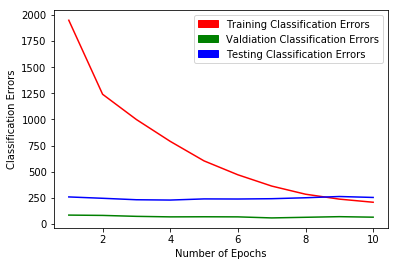

In [11]:
plt.plot(epochs_list, training_errors, 'r')
plt.plot(epochs_list, validation_errors, 'g')
plt.plot(epochs_list, testing_errors, 'b')

red_patch = mpatches.Patch(color='red', label='Training Classification Errors')
green_patch = mpatches.Patch(color='green', label='Valdiation Classification Errors')
blue_patch = mpatches.Patch(color='blue', label='Testing Classification Errors')

plt.xlabel('Number of Epochs')
plt.ylabel('Classification Errors')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

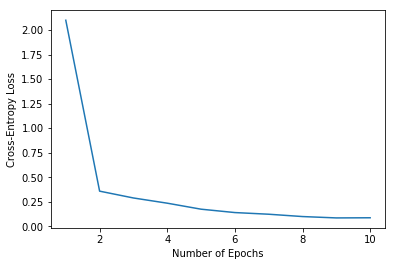

In [12]:
plt.plot(epochs_list, cross_entropy_losses)
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.show()

One observation to make here is that the cross entropy losses and the training accuracies are decreasing the more epochs that the training undergoes. And this is a good indication that the neural network is <b>learning</b>! The number of validation and testing classification errors seem to be stable throughout the training. At epoch ~9, we have observed that the training accuracy has surpassed the testing accuracy (or the number of training classification errors has now become less than the testing classification errors). We can see this in our first plot.

#### 1.1.3. Early Stopping
To avoid overfitting, we apply an <b>early stopping procedure</b>, which is a simple method that we can apply. This just means that at the point of early stopping, we can force the neural network to stop training/learning because it has already reached a very good accuracy, one such that by doing more training can detriment the testing accuracy. So we stop the training from that point of early stopping.

In our case, we can examine the first plot and say that the stopping point should be at the 9th epoch (epoch 8 when indexed at 0). As mentione earlier, the training accuracy has beaten the testing accuracy past this point and this is why at this point, we can stop the training and this will be considered the early stopping.

Below are the classification errors at that stopping point.

In [13]:
print("Training Classification Errors at Stopping Point:", training_errors[8])
print("Validation Classification Errors at Stopping Point:", validation_errors[8])
print("Testing Classification Errors at Stopping Point:", testing_errors[8])

Training Classification Errors at Stopping Point: 237
Validation Classification Errors at Stopping Point: 69
Testing Classification Errors at Stopping Point: 262


If we consider the cross entropy loss plot, we see that the losses are monotonically decreasing, except at the 9th epoch (epoch 8 when indexed from 0) (then increasing thereafter) which means that the early stopping point is here. 

So obviously the stopping points of the first and second plots are the same and we can definitely follow either one of them.

### 1.2 Effects of Hyperparameters
In this Exercise, we will be tweaking the number of hidden units, as well as the number of hidden layers. And see how this affects learning and performance.

#### 1.2.1. Number of Hidden Units
We just have taken a look at the case when there are 1000 hidden units. So we just need to take a look at 100 and 500 hidden units. Following from the previous exercise, the validation_error_percentages list contains the list of validation errors per epoch. And we will be storing the min of each of the list for 1000, 500 and 100 in some variables and do the comparison of models from there. So now, we'll do the one for 1000:

In [14]:
best_validation_error_1000 = min(validation_error_percentages)
best_validation_error_1000

0.04666668176651001

Let us now take a look at the model with 500 hidden units. 

In [15]:
X1 = tf.placeholder(tf.float32, [None, input_units])
y1 = tf.placeholder(tf.float32, [None, output_labels])

logits1 = mlp(X1, hidden_units_2)      # note: hidden_units_2 = 500

loss1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits1, labels=y1))
optimizer1 = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss1)

corr_pred1 = tf.equal(tf.argmax(logits1, 1), tf.argmax(y1, 1))
acc1 = tf.reduce_mean(tf.cast(corr_pred1, tf.float32))
errors1 = tf.subtract(tf.size(corr_pred1),tf.reduce_sum(tf.cast(corr_pred1, tf.int32)))

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    validation_error_percentages = []
    
    for epoch in range(epochs):
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer1,feed_dict={X1: train_batch_x, y1: train_batch_y})
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss1, acc1],feed_dict = {X1: train_batch_x, y1: train_batch_y})
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
            
            final_validation_error = 1 - acc1.eval({X1: valid_batch_x, y1: valid_batch_y})
            
        validation_error_percentages.append(final_validation_error)
        
        print("Training done for Epoch " + str(epoch))

    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Training complete.


Then find the best validation error among the epochs for hidden_units = 500

In [16]:
best_validation_error_500 = min(validation_error_percentages)
best_validation_error_500

0.04666668176651001

Now we shall replicate the same task above but this time for 100 hidden units.

In [17]:
X2 = tf.placeholder(tf.float32, [None, input_units])
y2 = tf.placeholder(tf.float32, [None, output_labels])

logits2 = mlp(X2, hidden_units_3)      # note: hidden_units_3 = 100

loss2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits2, labels=y2))
optimizer2 = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss2)

corr_pred2 = tf.equal(tf.argmax(logits2, 1), tf.argmax(y2, 1))
acc2 = tf.reduce_mean(tf.cast(corr_pred2, tf.float32))
errors2 = tf.subtract(tf.size(corr_pred2),tf.reduce_sum(tf.cast(corr_pred2, tf.int32)))

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    validation_error_percentages = []
    
    for epoch in range(epochs):
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer2,feed_dict={X2: train_batch_x, y2: train_batch_y})
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss2, acc2],feed_dict = {X2: train_batch_x, y2: train_batch_y})
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
            
            final_validation_error = 1 - acc2.eval({X2: valid_batch_x, y2: valid_batch_y})
            
        validation_error_percentages.append(final_validation_error)
        
        print("Training done for Epoch " + str(epoch))

    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Training complete.


Then find the best validation error among the epochs for hidden_units = 100

In [18]:
best_validation_error_100 = min(validation_error_percentages)
best_validation_error_100

0.06666666269302368

Now let's see which among the three models give the best valiation error.

In [19]:
print("Validation Error for 1000 hidden units: ", best_validation_error_1000)
print("Validation Error for 500 hidden units: ", best_validation_error_500)
print("Validation Error for 100 hidden units: ", best_validation_error_100)
np.min([best_validation_error_1000,best_validation_error_500,best_validation_error_100])

Validation Error for 1000 hidden units:  0.04666668176651001
Validation Error for 500 hidden units:  0.04666668176651001
Validation Error for 100 hidden units:  0.06666666269302368


0.04666668176651001

It seems like that the validation error for either the 1000 or 500 hidden unit model gives the same. Let's use the 1000-hidden unit model anyway. Below shows the testing classification error:

In [20]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    for epoch in range(epochs):
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer,feed_dict={X: train_batch_x, y: train_batch_y})
            
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss, acc],feed_dict = {X: train_batch_x, y: train_batch_y})
             
    newTestData = testData.reshape(2724,784)
    newTestTarget = newTestTarget.reshape(2724,10)
 
    testing_wrong_label = errors.eval({X: newTestData, y: newTestTarget})
    print("Testing Classification Errors: ", testing_wrong_label)

Testing Classification Errors:  240


We can observe that the more hidden units a neural network architecture has, the less misclassification it has and therefore can achieve a higher accuracy (i.e. better performance).

#### 1.2.2. Number of Hidden Layers
For this Exercise, we will be using 2 Hidden Layers of 500 Hidden Units each (total of 1000 hidden units). And then we shall compare its performance with the performance of our first model.

Since each of our two hidden layers would be having the same number of hidden units, we can use a similar version of our vectorized Python function from Ex 1.1.1. that takes in two parameters, a tensor and the number of hidden units (in this case is 500 per hidden).

In [21]:
def mlp2(X, hidden_units):
   initializer = tf.glorot_normal_initializer()

   weight_matrix = {
        'hidden_weight_1': tf.Variable(initializer([input_units, hidden_units])),
        'hidden_weight_2': tf.Variable(initializer([hidden_units, hidden_units])),
        'out_weight': tf.Variable(initializer([hidden_units, output_labels]))
    }
    
   bias_matrix = {
        'hidden_bias_1': tf.Variable(tf.zeros([hidden_units])),
        'hidden_bias_2': tf.Variable(tf.zeros([hidden_units])),
        'out_bias': tf.Variable(tf.zeros([output_labels]))
    }
    
        # building the feedforward neural network
   hidden_layer_1 = tf.add(tf.matmul(X, weight_matrix['hidden_weight_1']), bias_matrix['hidden_bias_1'])
   hidden_layer_1 = tf.nn.relu(hidden_layer_1)
   hidden_layer_2 = tf.add(tf.matmul(hidden_layer_1, weight_matrix['hidden_weight_2']), bias_matrix['hidden_bias_2'])
   hidden_layer_2 = tf.nn.relu(hidden_layer_2) 
   output_layer = tf.add(tf.matmul(hidden_layer_2, weight_matrix['out_weight']), bias_matrix['out_bias'])
    
   return output_layer

In [22]:
X2 = tf.placeholder(tf.float32, [None, input_units])
y2 = tf.placeholder(tf.float32, [None, output_labels])

logits2 = mlp2(X2, hidden_units_2)

loss2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits2, labels=y2))
optimizer2 = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss2)

corr_pred2 = tf.equal(tf.argmax(logits2, 1), tf.argmax(y2, 1))
acc2 = tf.reduce_mean(tf.cast(corr_pred2, tf.float32))
errors2 = tf.subtract(tf.size(corr_pred2),tf.reduce_sum(tf.cast(corr_pred2, tf.int32)))

In [23]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    training_errors = []
    validation_errors = []
    validation_error_percentages = []
    epochs_list = []
    
    for epoch in range(epochs):
        epochs_list.append(epoch+1)
        
        training_wrong_label = 0
        validating_wrong_label = 0
        
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer2,feed_dict={X2: train_batch_x, y2: train_batch_y})
            
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss2, acc2],feed_dict = {X2: train_batch_x, y2: train_batch_y})
            
            training_wrong_label += errors2.eval({X2: train_batch_x, y2: train_batch_y})
            
        training_errors.append(training_wrong_label)
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
        
            validating_wrong_label += errors2.eval({X2: valid_batch_x, y2: valid_batch_y})
            
            final_validation_error = 1 - acc2.eval({X2: valid_batch_x, y2: valid_batch_y})
            
        validation_errors.append(validating_wrong_label)
        validation_error_percentages.append(final_validation_error)
        
        
        print("Training done for Epoch " + str(epoch))

    newTestData = testData.reshape(2724,784)
    newTestTarget = newTestTarget.reshape(2724,10)

    test_acc = acc2.eval({X2: newTestData, y2: newTestTarget})
    print("Testing Accuracy: ", test_acc)
    
    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Testing Accuracy:  0.90161526
Training complete.


And here is the plot for training/validaiton classification errors vs the number of epochs

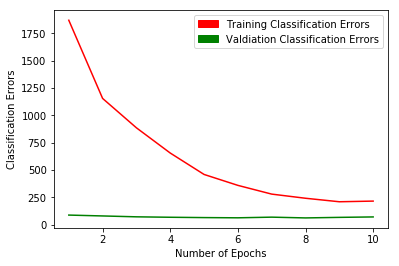

In [24]:
plt.plot(epochs_list, training_errors, 'r')
plt.plot(epochs_list, validation_errors, 'g')

red_patch = mpatches.Patch(color='red', label='Training Classification Errors')
green_patch = mpatches.Patch(color='green', label='Valdiation Classification Errors')

plt.xlabel('Number of Epochs')
plt.ylabel('Classification Errors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

And here are the final validation errors after the training is complete:

In [25]:
print("Final Validation Error: ", validation_error_percentages[9])
print("Final Validation Classification Error: ", validation_errors[9])

Final Validation Error:  0.06000000238418579
Final Validation Classification Error:  70


The testing accuracy for the 2-layer case gives us 90.2%

In [26]:
test_acc_2_layers = test_acc
test_acc_2_layers

0.90161526

Let us try running the 1-layer case again of 500 hidden units. Then make a comparison.

In [27]:
X1 = tf.placeholder(tf.float32, [None, input_units])
y1 = tf.placeholder(tf.float32, [None, output_labels])

logits1 = mlp(X1, hidden_units_2)      # note: hidden_units_2 = 500

loss1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits1, labels=y1))
optimizer1 = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss1)

corr_pred1 = tf.equal(tf.argmax(logits1, 1), tf.argmax(y1, 1))
acc1 = tf.reduce_mean(tf.cast(corr_pred1, tf.float32))
errors1 = tf.subtract(tf.size(corr_pred1),tf.reduce_sum(tf.cast(corr_pred1, tf.int32)))

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    for epoch in range(epochs):
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer1,feed_dict={X1: train_batch_x, y1: train_batch_y})
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss1, acc1],feed_dict = {X1: train_batch_x, y1: train_batch_y})
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
            
            final_validation_error = 1 - acc1.eval({X1: valid_batch_x, y1: valid_batch_y})
        
        print("Training done for Epoch " + str(epoch))
        
    newTestData = testData.reshape(2724,784)
    newTestTarget = newTestTarget.reshape(2724,10)

    test_acc_1_layer = acc1.eval({X1: newTestData, y1: newTestTarget})
    print("Testing Accuracy: ", test_acc_1_layer)

    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Testing Accuracy:  0.9170338
Training complete.


As one can see, the testing accuracy of the 1-layer case for 500 hidden units seems to be performing slightly better at 91.7% compared to the 90.2% accuracy of the 2-layer case. This might be because that the more layers a neural net architecture has, the more nonlinearities are applied to the data and more distangling of the data before the classification of the final layer.

### Regularization and Visualization
Here, we will be working with dropouts and visualizations.

#### 1.3.1. Dropout
We will be using the same architecture as 1.1.1. So we'll bring it back. This will be the case for no dropout. But we will save the training and validation classification errors when we compare it with the case with the dropout.

In [40]:
X = tf.placeholder(tf.float32, [None, input_units])
y = tf.placeholder(tf.float32, [None, output_labels])

logits = mlp(X, hidden_units_1)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss)

corr_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
errors = tf.subtract(tf.size(corr_pred),tf.reduce_sum(tf.cast(corr_pred, tf.int32)))

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    training_errors = []
    validation_errors = []
    epochs_list = []
    
    for epoch in range(epochs):
        epochs_list.append(epoch+1)
        
        training_wrong_label = 0
        validating_wrong_label = 0
        
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer,feed_dict={X: train_batch_x, y: train_batch_y})
            
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss, acc],feed_dict = {X: train_batch_x, y: train_batch_y})
            
            training_wrong_label += errors.eval({X: train_batch_x, y: train_batch_y})
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
        
            validating_wrong_label += errors.eval({X: valid_batch_x, y: valid_batch_y})
            
        print("Training done for Epoch " + str(epoch))

        training_errors.append(training_wrong_label)
        validation_errors.append(validating_wrong_label)
        
    test_acc = acc.eval({X: newTestData, y: newTestTarget})
    print("Testing Accuracy: ", test_acc)
        
    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Testing Accuracy:  0.9049192
Training complete.


In [41]:
training_errors_without_dropout = training_errors
validation_errors_without_dropout = validation_errors
test_acc_without_dropout = test_acc
print("Training errors without dropout: ", training_errors_without_dropout)
print("Validaition errors without dropout: ", validation_errors_without_dropout)
print("Testing Accuracy without dropout: ", test_acc_without_dropout)

Training errors without dropout:  [1960, 1228, 988, 790, 626, 479, 368, 295, 237, 195]
Validaition errors without dropout:  [89, 81, 77, 72, 69, 65, 71, 73, 63, 64]
Testing Accuracy without dropout:  0.9049192


Now we will be creating another version of the <b>mlp( )</b> function but this time with the dropout. Then have a new model train with dropout.

In [31]:
def mlp_with_dropout(X, hidden_units, keep_prob):
   initializer = tf.glorot_normal_initializer()

   weight_matrix = {
        'hidden_weight': tf.Variable(initializer([input_units, hidden_units])),
        'out_weight': tf.Variable(initializer([hidden_units, output_labels]))
    }
    
   bias_matrix = {
        'hidden_bias': tf.Variable(tf.zeros([hidden_units])),
        'out_bias': tf.Variable(tf.zeros([output_labels]))
    }
    
   hidden_layer = tf.add(tf.matmul(X, weight_matrix['hidden_weight']), bias_matrix['hidden_bias'])
   hidden_layer = tf.nn.relu(hidden_layer)
   hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)   # Introduce a dropout
   output_layer = tf.add(tf.matmul(hidden_layer, weight_matrix['out_weight']), bias_matrix['out_bias'])
    
   return output_layer

In [43]:
X = tf.placeholder(tf.float32, [None, input_units])
y = tf.placeholder(tf.float32, [None, output_labels])

keep_prob = tf.placeholder("float")   # for the dropout

logits = mlp_with_dropout(X, hidden_units_1, keep_prob)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss)

corr_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
errors = tf.subtract(tf.size(corr_pred),tf.reduce_sum(tf.cast(corr_pred, tf.int32)))

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    training_errors = []
    validation_errors = []
    epochs_list = []
    
    for epoch in range(epochs):
        epochs_list.append(epoch+1)
        
        training_wrong_label = 0
        validating_wrong_label = 0
        
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer,feed_dict={X: train_batch_x, y: train_batch_y, keep_prob: 1.0})
            
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss, acc],feed_dict = {X: train_batch_x, y: train_batch_y, keep_prob: 0.5})
            
            training_wrong_label += errors.eval({X: train_batch_x, y: train_batch_y, keep_prob: 0.5})
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
        
            validating_wrong_label += errors.eval({X: valid_batch_x, y: valid_batch_y, keep_prob: 1.0})
            
        print("Training done for Epoch " + str(epoch))

        training_errors.append(training_wrong_label)
        validation_errors.append(validating_wrong_label)
        
    test_acc = acc.eval({X: newTestData, y: newTestTarget, keep_prob: 1.0})
    print("Testing Accuracy: ", test_acc)
        
    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Testing Accuracy:  0.9052864
Training complete.


In [44]:
training_errors_with_dropout = training_errors
validation_errors_with_dropout = validation_errors
test_acc_with_dropout = test_acc
print("Training errors with dropout: ", training_errors_with_dropout)
print("Validaition errors with dropout: ", validation_errors_with_dropout)
print("Testing Accuracy with dropout: ", test_acc_with_dropout)

Training errors with dropout:  [2461, 1512, 1232, 1061, 965, 839, 776, 757, 758, 718]
Validaition errors with dropout:  [91, 79, 75, 69, 64, 61, 65, 69, 70, 66]
Testing Accuracy with dropout:  0.9052864


As one can observe the performance of the model with the dropout turned out to be slightly higher than the performance without dropout.

And here is the plot of training/validaiton classification errors vs epochs for the dropout case.

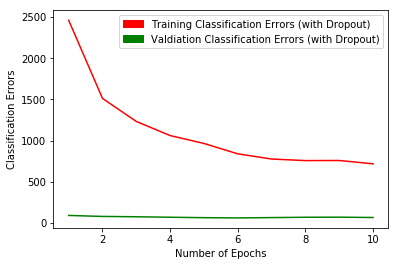

In [45]:
plt.plot(epochs_list, training_errors_with_dropout, 'r')
plt.plot(epochs_list, validation_errors_with_dropout, 'g')

red_patch = mpatches.Patch(color='red', label='Training Classification Errors (with Dropout)')
green_patch = mpatches.Patch(color='green', label='Valdiation Classification Errors (with Dropout)')

plt.xlabel('Number of Epochs')
plt.ylabel('Classification Errors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

#### 1.3.2. Visualization
We will visualize what the hidden neurons have actually learnt for each checkpoint of the training: at 25%, 50%, 75% and 100%. In this case, after epoch 2, epoch 5, epoch 7 and after the training has completed. Let's revisit first the version without drouputs.

In [110]:
X = tf.placeholder(tf.float32, [None, input_units])
y = tf.placeholder(tf.float32, [None, output_labels])

logits = mlp(X, hidden_units_1)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss)

predicted_value = tf.argmax(logits,1)
corr_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
errors = tf.subtract(tf.size(corr_pred),tf.reduce_sum(tf.cast(corr_pred, tf.int32)))

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    training_errors = []
    validation_errors = []
    epochs_list = []
    
    for epoch in range(epochs):
        epochs_list.append(epoch+1)
        
        training_wrong_label = 0
        validating_wrong_label = 0
        
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer,feed_dict={X: train_batch_x, y: train_batch_y})
            
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss, acc],feed_dict = {X: train_batch_x, y: train_batch_y})
            
            training_wrong_label += errors.eval({X: train_batch_x, y: train_batch_y})
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
        
            validating_wrong_label += errors.eval({X: valid_batch_x, y: valid_batch_y})
            
        print("Training done for Epoch " + str(epoch))

        training_errors.append(training_wrong_label)
        validation_errors.append(validating_wrong_label)
        
        if epoch == 2:
            rn_25 = np.random.randint(low=0, high=2724-1, size=1)
            ntd_25 = newTestData[rn_25].reshape(28,28)
            predict_25 = predicted_value.eval({X: newTestData[rn_25]})
            
        if epoch == 5:
            rn_50 = np.random.randint(low=0, high=2724-1, size=1)
            ntd_50 = newTestData[rn_50].reshape(28,28)
            predict_50 = predicted_value.eval({X: newTestData[rn_50]})
            
        if epoch == 7:
            rn_75 = np.random.randint(low=0, high=2724-1, size=1)
            ntd_75 = newTestData[rn_75].reshape(28,28)
            predict_75 = predicted_value.eval({X: newTestData[rn_75]})
        
    test_acc = acc.eval({X: newTestData, y: newTestTarget})
    print("Testing Accuracy: ", test_acc)
    
    rn_100 = np.random.randint(low=0, high=2724-1, size=1)
    ntd_100 = newTestData[rn_100].reshape(28,28)
    predict_100 = predicted_value.eval({X: newTestData[rn_100]})
        
    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Testing Accuracy:  0.9078561
Training complete.


Here are the test results for some random data and its prediction for the no dropout case for each checkpoint.

Predicted letter with no dropout at 25% Checkpoint:  B


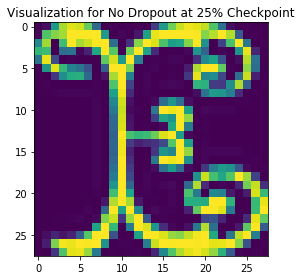

In [111]:
print("Predicted letter with no dropout at 25% Checkpoint: ", chr(predict_25+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_25)

axis.set_title("Visualization for No Dropout at 25% Checkpoint")
heatmap.tight_layout()
plt.show()

Predicted letter with no dropout at 50% Checkpoint:  I


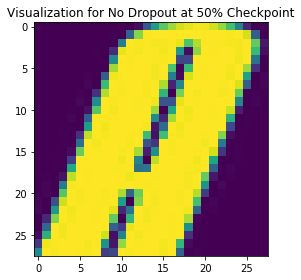

In [112]:
print("Predicted letter with no dropout at 50% Checkpoint: ", chr(predict_50+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_50)

axis.set_title("Visualization for No Dropout at 50% Checkpoint")
heatmap.tight_layout()
plt.show()

Predicted letter with no dropout at 75% Checkpoint:  D


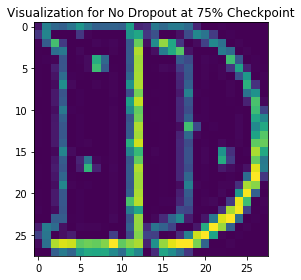

In [113]:
print("Predicted letter with no dropout at 75% Checkpoint: ", chr(predict_75+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_75)

axis.set_title("Visualization for No Dropout at 75% Checkpoint")
heatmap.tight_layout()
plt.show()

Predicted letter with no dropout at 100% Checkpoint:  G


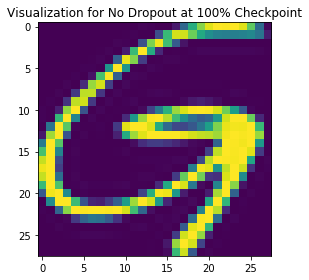

In [114]:
print("Predicted letter with no dropout at 100% Checkpoint: ", chr(predict_100+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_100)

axis.set_title("Visualization for No Dropout at 100% Checkpoint")
heatmap.tight_layout()
plt.show()

Now let's do the case for the dropout version.

In [115]:
X = tf.placeholder(tf.float32, [None, input_units])
y = tf.placeholder(tf.float32, [None, output_labels])

keep_prob = tf.placeholder("float")   # for the dropout

logits = mlp_with_dropout(X, hidden_units_1, keep_prob)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_3).minimize(loss)

predicted_value = tf.argmax(logits,1)
corr_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
errors = tf.subtract(tf.size(corr_pred),tf.reduce_sum(tf.cast(corr_pred, tf.int32)))

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    training_errors = []
    validation_errors = []
    epochs_list = []
    
    for epoch in range(epochs):
        epochs_list.append(epoch+1)
        
        training_wrong_label = 0
        validating_wrong_label = 0
        
        batch_train = np.shape(trainData)[0]
        total_batch = int(batch_train/batch_size)
        train_batches_X = np.array_split(trainData, total_batch)
        train_batches_Y = np.array_split(newTrainTarget, total_batch)

        for i in range(total_batch):
            train_batch_x, train_batch_y = train_batches_X[i], train_batches_Y[i]
            train_batch_x = train_batch_x.reshape(150,784)
            train_batch_y = train_batch_y.reshape(150,10)
            
            sess.run(optimizer,feed_dict={X: train_batch_x, y: train_batch_y, keep_prob: 1.0})
            
            if i % step_size == 0 or i == 0:
                loss_value, acc_value = sess.run([loss, acc],feed_dict = {X: train_batch_x, y: train_batch_y, keep_prob: 0.5})
            
            training_wrong_label += errors.eval({X: train_batch_x, y: train_batch_y, keep_prob: 1.0})
            
        valid_batch = int(np.shape(validData)[0]/batch_size)
        valid_batches_X = np.array_split(validData[:900], valid_batch)
        valid_batches_Y = np.array_split(newValidTarget[:900], valid_batch)
        
        for j in range(valid_batch):
            valid_batch_x, valid_batch_y = valid_batches_X[j], valid_batches_Y[j]
            valid_batch_x = valid_batch_x.reshape(150,784)
            valid_batch_y = valid_batch_y.reshape(150,10)
        
            validating_wrong_label += errors.eval({X: valid_batch_x, y: valid_batch_y, keep_prob: 1.0})
            
        print("Training done for Epoch " + str(epoch))

        training_errors.append(training_wrong_label)
        validation_errors.append(validating_wrong_label)
        
        if epoch == 2:
            rn_25 = np.random.randint(low=0, high=2724-1, size=1)
            ntd_25 = newTestData[rn_25].reshape(28,28)
            predict_25 = predicted_value.eval({X: newTestData[rn_25], keep_prob: 1.0})
            
        if epoch == 5:
            rn_50 = np.random.randint(low=0, high=2724-1, size=1)
            ntd_50 = newTestData[rn_50].reshape(28,28)
            predict_50 = predicted_value.eval({X: newTestData[rn_50], keep_prob: 1.0})
            
        if epoch == 7:
            rn_75 = np.random.randint(low=0, high=2724-1, size=1)
            ntd_75 = newTestData[rn_75].reshape(28,28)
            predict_75 = predicted_value.eval({X: newTestData[rn_75], keep_prob: 1.0})
        
    test_acc = acc.eval({X: newTestData, y: newTestTarget, keep_prob: 1.0})
    print("Testing Accuracy: ", test_acc)
    
    rn_100 = np.random.randint(low=0, high=2724-1, size=1)
    ntd_100 = newTestData[rn_100].reshape(28,28)
    predict_100 = predicted_value.eval({X: newTestData[rn_100], keep_prob: 1.0})
        
    print("Training complete.")

Training done for Epoch 0
Training done for Epoch 1
Training done for Epoch 2
Training done for Epoch 3
Training done for Epoch 4
Training done for Epoch 5
Training done for Epoch 6
Training done for Epoch 7
Training done for Epoch 8
Training done for Epoch 9
Testing Accuracy:  0.9056535
Training complete.


At each checkpoint, we test some random data and its prediction.

Predicted letter with dropout at 25% Checkpoint:  A


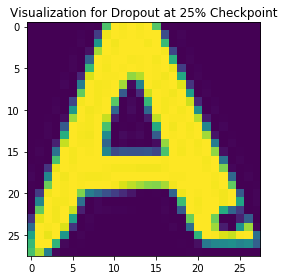

In [116]:
print("Predicted letter with dropout at 25% Checkpoint: ", chr(predict_25+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_25)

axis.set_title("Visualization for Dropout at 25% Checkpoint")
heatmap.tight_layout()
plt.show()

Predicted letter with dropout at 50% Checkpoint:  H


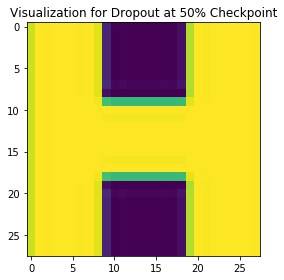

In [117]:
print("Predicted letter with dropout at 50% Checkpoint: ", chr(predict_50+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_50)

axis.set_title("Visualization for Dropout at 50% Checkpoint")
heatmap.tight_layout()
plt.show()

Predicted letter with dropout at 75% Checkpoint:  A


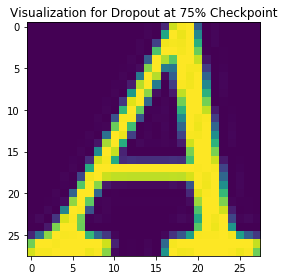

In [118]:
print("Predicted letter with dropout at 75% Checkpoint: ", chr(predict_75+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_75)

axis.set_title("Visualization for Dropout at 75% Checkpoint")
heatmap.tight_layout()
plt.show()

Predicted letter with dropout at 100% Checkpoint:  F


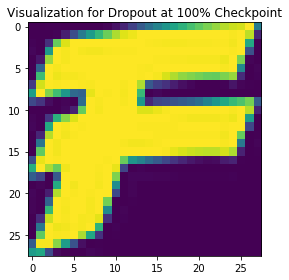

In [119]:
print("Predicted letter with dropout at 100% Checkpoint: ", chr(predict_100+65))
heatmap, axis = plt.subplots()
im = axis.imshow(ntd_100)

axis.set_title("Visualization for Dropout at 100% Checkpoint")
heatmap.tight_layout()
plt.show()

<b>Some Observations</b>: Notice that for the case without dropout, we have found some misclassifications up until 50% of the training and after that we have seem to have good accuracy for not being able to find misclassifications. For the version with the dropout, which seemed to be better in performance, none of the four tests that we have tried out for the checkpoints are misclassified.